In [2]:
### Function Imports
from CorrFunctions import import_fx_data, plot_forex, corr_matrix, stacked_correlations, daily_rets_most_corr, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [3]:
### Load in FX Rate Data
all_forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
    'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
    'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
    'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
]
forex_pairs = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'AUDUSD=X']
start_date = '2021-01-01'
forex_data = import_fx_data(forex_pairs, start_date)
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,EURUSD=X,GBPUSD=X,JPYUSD=X,AUDUSD=X
901,2024-06-17,1.070217,1.268311,0.006347,0.661288
902,2024-06-18,1.074068,1.271600,0.006341,0.662208
903,2024-06-19,1.074229,1.270745,0.006334,0.666120
904,2024-06-20,1.075153,1.272200,0.006331,0.667530
905,2024-06-21,1.069633,1.264031,0.006272,0.664218


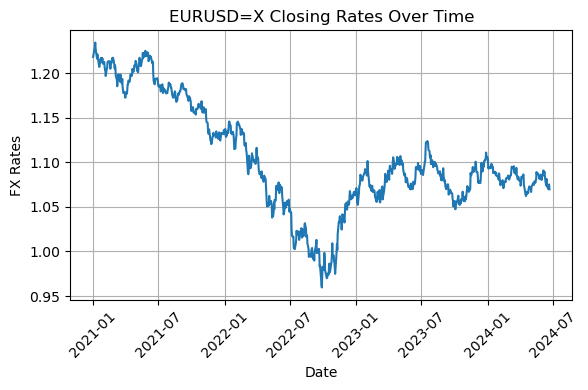

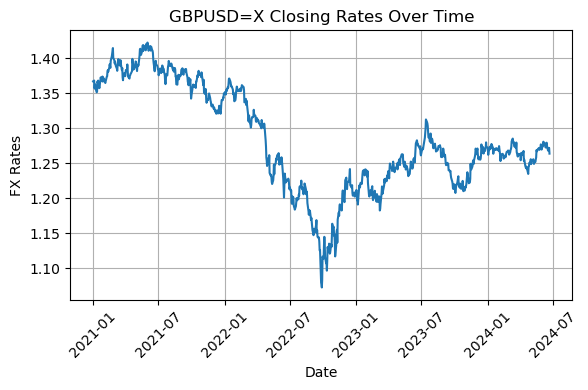

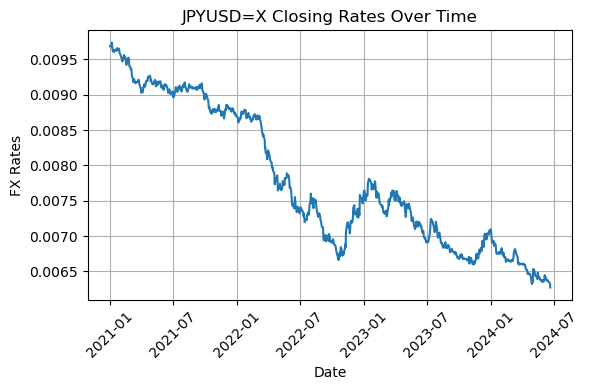

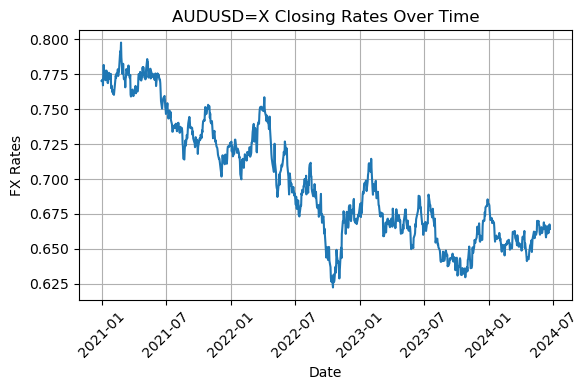

In [4]:
### Plot FX Rate Data
plot_forex(forex_data, forex_pairs)

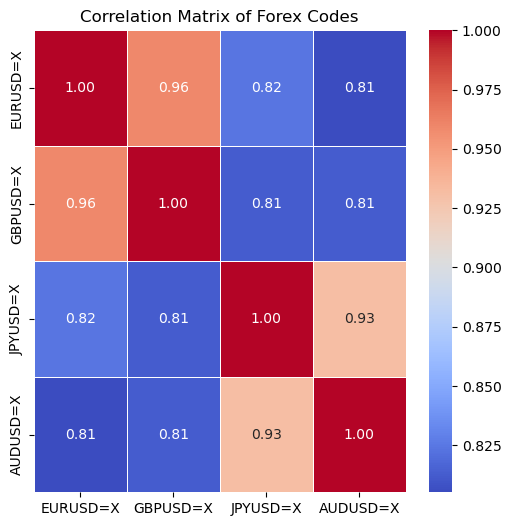

In [5]:
### Correlation Matrix Heatmap
corr_matrix(forex_data)

In [6]:
### Return Stacked Correlation -> Chose the forex pairs that are the most correlated (top of the list)
stacked_corr = stacked_correlations(forex_data)
print(stacked_corr.head(5))

GBPUSD=X  EURUSD=X    0.958944
EURUSD=X  GBPUSD=X    0.958944
AUDUSD=X  JPYUSD=X    0.931052
JPYUSD=X  AUDUSD=X    0.931052
EURUSD=X  JPYUSD=X    0.823905
dtype: float64


In [7]:
### Compute daily returns of Most Correlated Pairs
most_corr_pairs, returns = daily_rets_most_corr(forex_data)
print("Most correlated pairs:", most_corr_pairs)
returns.tail()


Most correlated pairs: ['GBPUSD=X', 'EURUSD=X']


,Date,GBPUSD=X,EURUSD=X
900,2024-06-17,-0.005644,-0.003414
901,2024-06-18,0.002593,0.003598
902,2024-06-19,-0.000672,0.000150
903,2024-06-20,0.001145,0.000860
904,2024-06-21,-0.006421,-0.005134


In [8]:
### Compute VAR
# Calculate the 95% Value at Risk (VaR) for each currency pair
# Ex. When EURUSD=X: -0.008645, that means with 95% confidence, the most that the EURUSD rate is expected to 
# lose in one day is approximately 0.8645% of its value.
VaR = returns.quantile(0.05)
print("Value at Risk (95% Confidence level):\n", VaR)

Value at Risk (95% Confidence level):
 Date        2021-03-08 04:48:00
GBPUSD=X              -0.009167
EURUSD=X              -0.007982
Name: 0.05, dtype: object


In [9]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(most_corr_pairs, returns)
print("Hedge Ratio:", hedge_ratio)


Hedge Ratio: 0.6481139143397971


In [10]:
### Backtesting -> Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, most_corr_pairs, returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))


Long Position Size:  1000
Short Position Size:  -648.1139
Recent Hedged Cumulative Returns:  900    1009.775712
901    1010.039064
902    1009.261604
903    1009.854532
904    1006.730326
dtype: float64
Recent Unhedged Cumulative Returns:  900    927.602258
901    930.007367
902    929.382157
903    930.446261
904    924.471588
Name: GBPUSD=X, dtype: float64


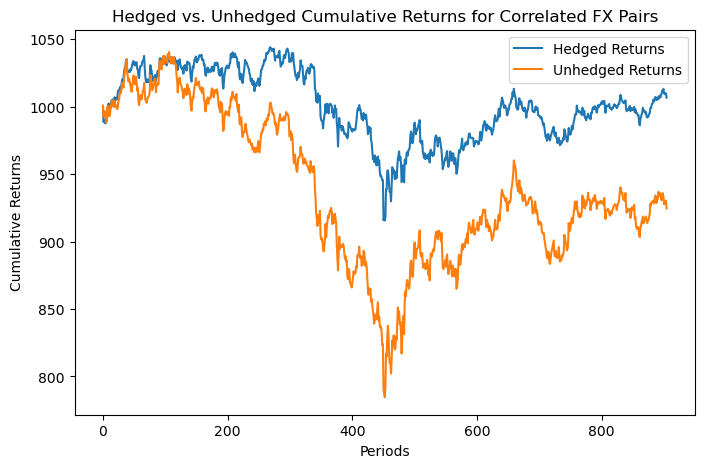

In [11]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [12]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, returns)

Metric                                  Hedged        Unhedged
Total Returns                           6.7303        -75.5284
Annualized Returns                      0.7673             nan
Mean Return                          1000.6016        938.2350
Standard Deviation                     25.8198         54.7645
Sharpe Ratio                          615.1882        271.9651

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 615.1882,
which means for every unit of risk, the hedged portfolio is generating 615.1882 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 271.9651,
indicating that for every unit of risk, the unhedged portfolio is generating 271.9651 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
